# Human Activity Recognition

## Exploratory Data Analysis

**Future Improvements for this section**
- Create a custom function for reading and creating the train and test dataframes from text data

In [95]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the feature names from feature text file

features = list()
with open('../data/UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [14]:
# checking if there are duplicate features in the list
len(features) != len(set(features))

True

In [26]:
# finding the duplicates feature names
# https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them
seen = set()
dupes = []

for x in features:
    if x in seen:
        dupes.append(x)
    else:
        seen.add(x)

In [27]:
dupes[:10]

['fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32']

I will let Pandas generate new feature heading names for the duplicates since the data as such is not duplicate, only the labels are duplicated names

In [29]:
# Getting the train data

X_train = pd.read_csv('../data/UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=0)
X_train.columns = features
X_train.shape

(7351, 561)

In [30]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [33]:
# Getting the subject (Person under study data) as a new column to the train dataset

X_train['subject'] = pd.read_csv('../data/UCI_HAR_dataset/train/subject_train.txt', header = None)

In [36]:
# Adding the y train data

y_train = pd.read_csv('../data/UCI_HAR_dataset/train/y_train.txt', names=['Activity'])

In [64]:
# Create the dictionary of the y_train activity data

activity_dictionary = {1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'}
y_train_labels = [activity_dictionary[x] for x in y_train.squeeze().values]

In [70]:
y_train.squeeze()

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: Activity, Length: 7352, dtype: int64

In [71]:
# Adding the information to the train dataframe

train = X_train
train['Activity'] = y_train.squeeze()
train['ActivityName'] = pd.Series(y_train_labels)
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3285,0.27873,-0.015182,-0.10163,-0.998263,-0.991865,-0.99173,-0.998342,-0.990641,-0.991407,-0.941607,...,-0.015082,0.258109,-0.133621,0.137888,-0.86661,0.040049,0.096099,17,4,SITTING


In [72]:
# Perform the above operations for the test data

X_test = pd.read_csv('../data/UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=0)
X_test.columns = features
X_test.shape

(2946, 561)

In [74]:

X_test['subject'] = pd.read_csv('../data/UCI_HAR_dataset/test/subject_test.txt', header = None)
y_test = pd.read_csv('../data/UCI_HAR_dataset/test/y_test.txt', names=['Activity'])
y_test_labels = [activity_dictionary[x] for x in y_test.squeeze().values]


In [75]:
# Adding the information to the test dataframe

test = X_test
test['Activity'] = y_test.squeeze()
test['ActivityName'] = pd.Series(y_test_labels)
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2122,0.268451,-0.0183,-0.105905,-0.981014,-0.978761,-0.987595,-0.982336,-0.977646,-0.988867,-0.924599,...,0.016157,0.112434,0.056465,0.416371,0.400846,-0.305401,-0.681752,18,6,LAYING


## Data Cleaning

In [94]:
# Checking if any rows are duplicates
print(f'train data number of duplicates, {sum(train.duplicated())}')
print(f'test data number of duplicates, {sum(test.duplicated())}')

# Checking for Null or Nan values in train and test data
print(f'train data number of null or Nan, {train.isnull().values.sum()}')
print(f'test data number of null or Nan, {test.isnull().values.sum()}')

train data number of duplicates, 0
test data number of duplicates, 0
train data number of null or Nan, 0
test data number of null or Nan, 0


## Data Count

In [145]:
def data_count_plot(df, colname):
    data_bygroup = df.groupby([colname]).size()

    plt.barh(data_bygroup.index, data_bygroup.values)
    plt.ylabel(colname)
    plt.xlabel("Counts")
    plt.title(f"DataCount in dataset")
    plt.show()

    

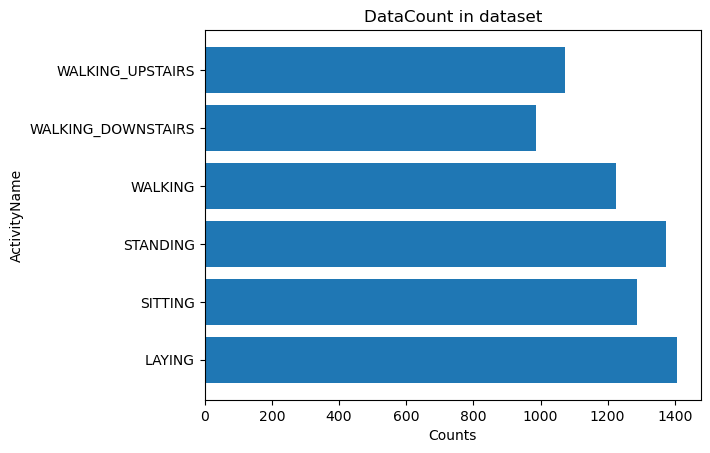

In [146]:
# Seeing the datacount in train dataframe

data_count_plot(train, "ActivityName")

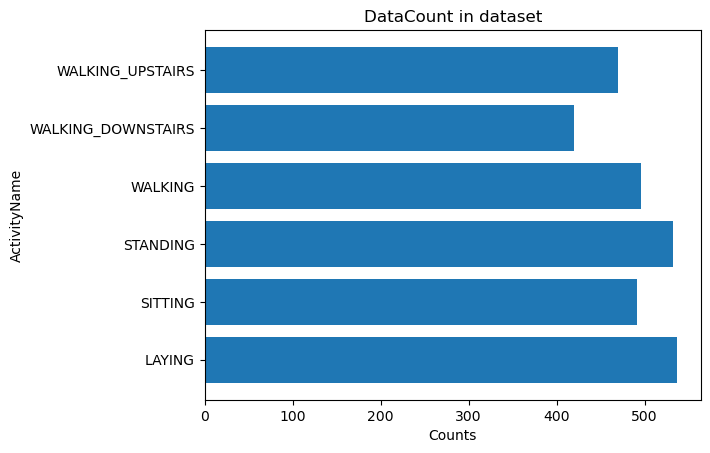

In [147]:
# Seeing the datacount in test dataframe

data_count_plot(test, "ActivityName")